In [122]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.ensemble as ek
import matplotlib.pyplot as plt

from lightgbm import LGBMClassifier
from IPython.display import display
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, learning_curve,  cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
# Load the dataset (adjust the file path if necessary)
dataset = pd.read_csv('MAL_DATASET.csv')
print("\nSetup complete")



Setup complete


In [121]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------------------------------------ --- 1.3/1.5 MB 7.4 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 5.1 MB/s eta 0:00:00


In [3]:
total_size = dataset.shape[0]
print("Total number of samples:", total_size)

Total number of samples: 19611


In [4]:
dataset['Malware'].value_counts(), dataset.isnull().sum().sum()

(Malware
 1    14599
 0     5012
 Name: count, dtype: int64,
 np.int64(0))

In [5]:
dataset.head() 

,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,VirusShare_a878ba26000edaac5c98eff4432723b3,23117,144,3,0,4,0,65535,0,184,...,3758096608,0,7,152,0,0,54440,77824,73728,0
1,VirusShare_ef9130570fddc174b312b2047f5f4cf0,23117,144,3,0,4,0,65535,0,184,...,3791650880,0,16,311,0,0,262276,294912,0,346112
2,VirusShare_ef84cdeba22be72a69b198213dada81a,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,6,176,0,0,36864,40960,0,0
3,VirusShare_6bf3608e60ebc16cbcff6ed5467d469e,23117,144,3,0,4,0,65535,0,184,...,3224371328,0,8,155,0,0,356352,1003520,0,14109472
4,VirusShare_2cc94d952b2efb13c7d6bbe0dd59d3fb,23117,144,3,0,4,0,65535,0,184,...,3227516992,0,2,43,0,0,61440,73728,0,90624


In [6]:
dataset.tail() 

,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
19606,clip.exe,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,8,85,0,0,24948,28672,0,0
19607,VNC-Server-6.2.0-Windows.exe,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,10,391,0,0,1413420,1462272,0,18855424
19608,Microsoft.GroupPolicy.Management.ni.dll,23117,0,0,0,0,0,0,0,0,...,3758096448,0,0,0,0,0,0,61440,0,0
19609,cryptuiwizard.dll,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,12,162,8,89008,94904,102400,0,0
19610,winhttp.dll,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,35,226,58,8348,545812,557056,0,0


In [7]:
dataset.describe(include="all")

,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
count,19611,19611.0,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.00000,...,1.961100e+04,19611.0,19611.000000,19611.000000,19611.000000,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04
unique,19611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,winhttp.dll,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,23117.0,178.615726,71.660752,49.146958,37.370710,37.032635,64178.739687,10.418490,226.46530,...,3.163632e+09,0.0,6.112437,101.912804,14.131865,3.368566e+05,4.047213e+05,5.555810e+05,1.238834e+06,8.814868e+05
std,NaN,0.0,987.200729,1445.192977,1212.201919,864.515405,915.833139,9110.755873,637.116265,1249.68033,...,5.860332e+08,0.0,7.525158,127.076767,154.958102,2.181191e+07,4.704601e+06,6.772167e+06,5.868961e+07,2.167579e+07
min,NaN,23117.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,1.073742e+09,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,23117.0,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,...,3.221226e+09,0.0,2.000000,17.000000,0.000000,0.000000e+00,2.960400e+04,4.096000e+04,0.000000e+00,0.000000e+00
50%,NaN,23117.0,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,...,3.221226e+09,0.0,4.000000,80.000000,0.000000,0.000000e+00,8.222400e+04,1.310720e+05,0.000000e+00,0.000000e+00
75%,NaN,23117.0,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,...,3.221226e+09,0.0,8.000000,135.000000,0.000000,0.000000e+00,2.477080e+05,3.870720e+05,0.000000e+00,3.184640e+05


In [8]:
display(dataset)

,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,VirusShare_a878ba26000edaac5c98eff4432723b3,23117,144,3,0,4,0,65535,0,184,...,3758096608,0,7,152,0,0,54440,77824,73728,0
1,VirusShare_ef9130570fddc174b312b2047f5f4cf0,23117,144,3,0,4,0,65535,0,184,...,3791650880,0,16,311,0,0,262276,294912,0,346112
2,VirusShare_ef84cdeba22be72a69b198213dada81a,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,6,176,0,0,36864,40960,0,0
3,VirusShare_6bf3608e60ebc16cbcff6ed5467d469e,23117,144,3,0,4,0,65535,0,184,...,3224371328,0,8,155,0,0,356352,1003520,0,14109472
4,VirusShare_2cc94d952b2efb13c7d6bbe0dd59d3fb,23117,144,3,0,4,0,65535,0,184,...,3227516992,0,2,43,0,0,61440,73728,0,90624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19606,clip.exe,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,8,85,0,0,24948,28672,0,0
19607,VNC-Server-6.2.0-Windows.exe,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,10,391,0,0,1413420,1462272,0,18855424
19608,Microsoft.GroupPolicy.Management.ni.dll,23117,0,0,0,0,0,0,0,0,...,3758096448,0,0,0,0,0,0,61440,0,0
19609,cryptuiwizard.dll,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,12,162,8,89008,94904,102400,0,0


In [9]:
X = dataset.drop(columns=['Malware'])
feature_names = X.columns  # Save the feature names
print(feature_names)

Index(['Name', 'e_magic', 'e_cblp', 'e_cp', 'e_crlc', 'e_cparhdr',
       'e_minalloc', 'e_maxalloc', 'e_ss', 'e_sp', 'e_csum', 'e_ip', 'e_cs',
       'e_lfarlc', 'e_ovno', 'e_oemid', 'e_oeminfo', 'e_lfanew', 'Machine',
       'NumberOfSections', 'TimeDateStamp', 'PointerToSymbolTable',
       'NumberOfSymbols', 'SizeOfOptionalHeader', 'Characteristics', 'Magic',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'ImageBase', 'SectionAlignment',
       'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfHeaders',
       'CheckSum', 'SizeOfImage', 'Subsystem', 'DllCharacteristics',
       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes',
       'SuspiciousI

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19611 entries, 0 to 19610
Data columns (total 79 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          19611 non-null  object 
 1   e_magic                       19611 non-null  int64  
 2   e_cblp                        19611 non-null  int64  
 3   e_cp                          19611 non-null  int64  
 4   e_crlc                        19611 non-null  int64  
 5   e_cparhdr                     19611 non-null  int64  
 6   e_minalloc                    19611 non-null  int64  
 7   e_maxalloc                    19611 non-null  int64  
 8   e_ss                          19611 non-null  int64  
 9   e_sp                          19611 non-null  int64  
 10  e_csum                        19611 non-null  int64  
 11  e_ip                          19611 non-null  int64  
 12  e_cs                          19611 non-null  int64  
 13  e

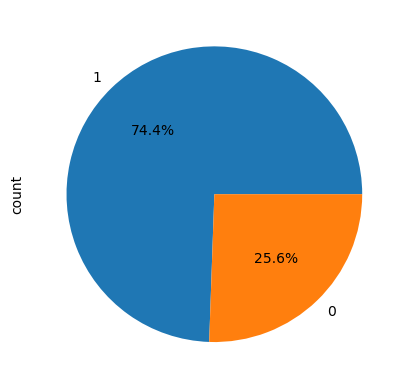

In [11]:
dataset["Malware"].value_counts().plot(kind="pie",autopct="%1.1f%%")
plt.show()

In [12]:
X = dataset.drop(columns=['Name', 'Malware'])  #Droping this because classification model will not accept object type elements (float and int only)
y = dataset['Malware']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nData split into training and testing sets.")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


Data split into training and testing sets.
X_train shape: (15688, 77)
X_test shape: (3923, 77)


In [14]:
def train_and_evaluate(model, model_name):
    """
    Trains and evaluates a given machine learning model.
    It prints accuracy, a classification report, and generates a confusion matrix plot.

    Parameters:
    model: The scikit-learn model instance to be trained and evaluated.
    model_name (str): A string name for the model (e.g., "Decision_Tree", "SVM").
    """
    print(f"\n--- Training and Evaluating {model_name.replace('_', ' ')} ---")

    
    model.fit(X_train, y_train)

    
    y_pred = model.predict(X_test)

    
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}\n")

    
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4)) # Set plot size
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                xticklabels=['Benign', 'Malware'], yticklabels=['Benign', 'Malware'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'{model_name.replace("_", " ")} - Confusion Matrix')
    plt.savefig(f'{model_name}_confusion_matrix.png') 
    plt.show() 
    plt.close() 

    return acc 

print("\nEvaluation function defined.")


Evaluation function defined.



--- Training and Evaluating Decision Tree ---
Accuracy: 0.9860

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1003
           1       0.99      0.99      0.99      2920

    accuracy                           0.99      3923
   macro avg       0.98      0.98      0.98      3923
weighted avg       0.99      0.99      0.99      3923



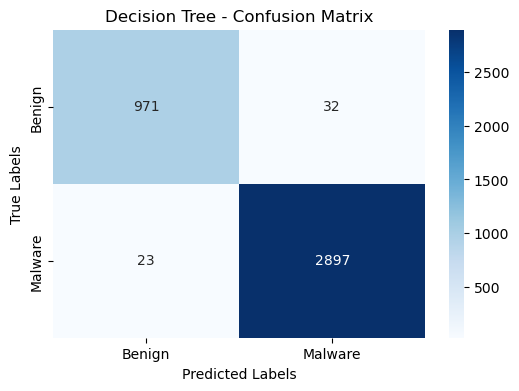


--- Training and Evaluating SVM ---
Accuracy: 0.7466

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.01      0.02      1003
           1       0.75      1.00      0.85      2920

    accuracy                           0.75      3923
   macro avg       0.87      0.50      0.44      3923
weighted avg       0.81      0.75      0.64      3923



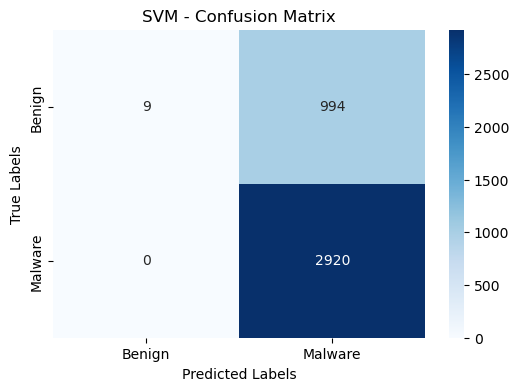


--- Training and Evaluating KNN ---
Accuracy: 0.9832

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1003
           1       0.99      0.99      0.99      2920

    accuracy                           0.98      3923
   macro avg       0.98      0.97      0.98      3923
weighted avg       0.98      0.98      0.98      3923



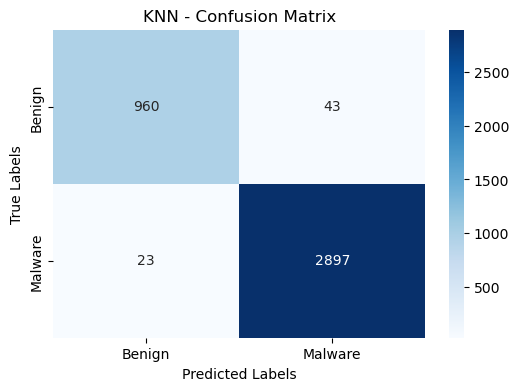


--- Training and Evaluating Naive Bayes ---
Accuracy: 0.3227

Classification Report:
              precision    recall  f1-score   support

           0       0.27      1.00      0.43      1003
           1       0.99      0.09      0.17      2920

    accuracy                           0.32      3923
   macro avg       0.63      0.54      0.30      3923
weighted avg       0.81      0.32      0.23      3923



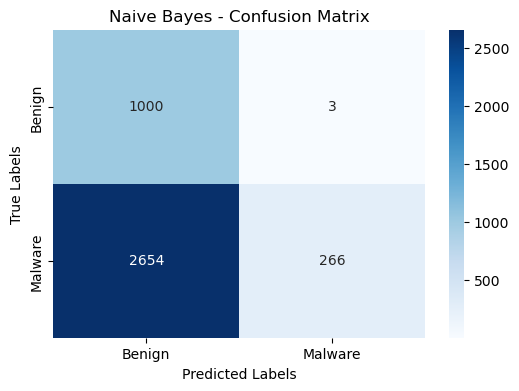


--- Training and Evaluating Random Forest ---
Accuracy: 0.9913

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1003
           1       0.99      1.00      0.99      2920

    accuracy                           0.99      3923
   macro avg       0.99      0.98      0.99      3923
weighted avg       0.99      0.99      0.99      3923



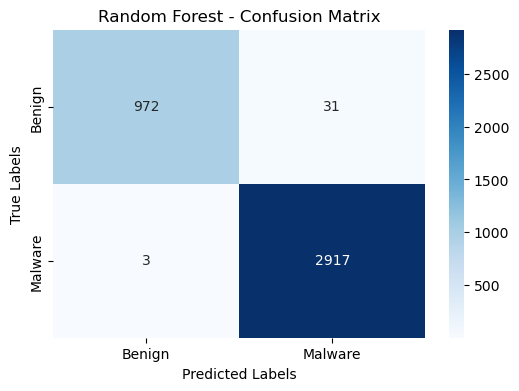


--- Training and Evaluating LightGBM ---
[LightGBM] [Info] Number of positive: 11679, number of negative: 4009
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001910 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6446
[LightGBM] [Info] Number of data points in the train set: 15688, number of used features: 68
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.744454 -> initscore=1.069251
[LightGBM] [Info] Start training from score 1.069251
Accuracy: 0.9926

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1003
           1       0.99      1.00      1.00      2920

    accuracy                           0.99      3923
   macro avg       0.99      0.99      0.99      3923
weighted avg       0.99      0.99      0.99      3923



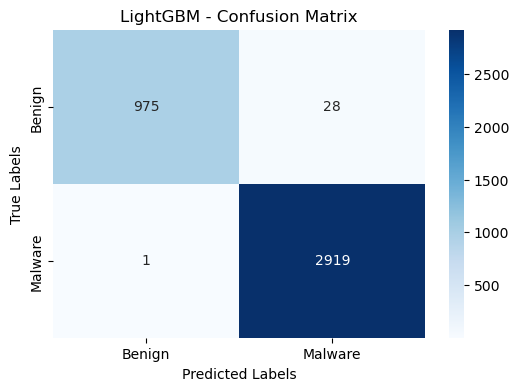

In [128]:
dt = DecisionTreeClassifier(random_state=42) 
acc_dt = train_and_evaluate(dt, "Decision_Tree")


svm_model = SVC(random_state=42) 
acc_svm = train_and_evaluate(svm_model, "SVM")

knn = KNeighborsClassifier(n_neighbors=5)
acc_knn = train_and_evaluate(knn, "KNN")

nb = GaussianNB()
acc_nb = train_and_evaluate(nb, "Naive_Bayes")

rf = RandomForestClassifier(n_estimators=100, random_state=42) 
acc_rf = train_and_evaluate(rf, "Random_Forest")

lgb = LGBMClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=-1,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
acc_lgb = train_and_evaluate(lgb,"LightGBM")

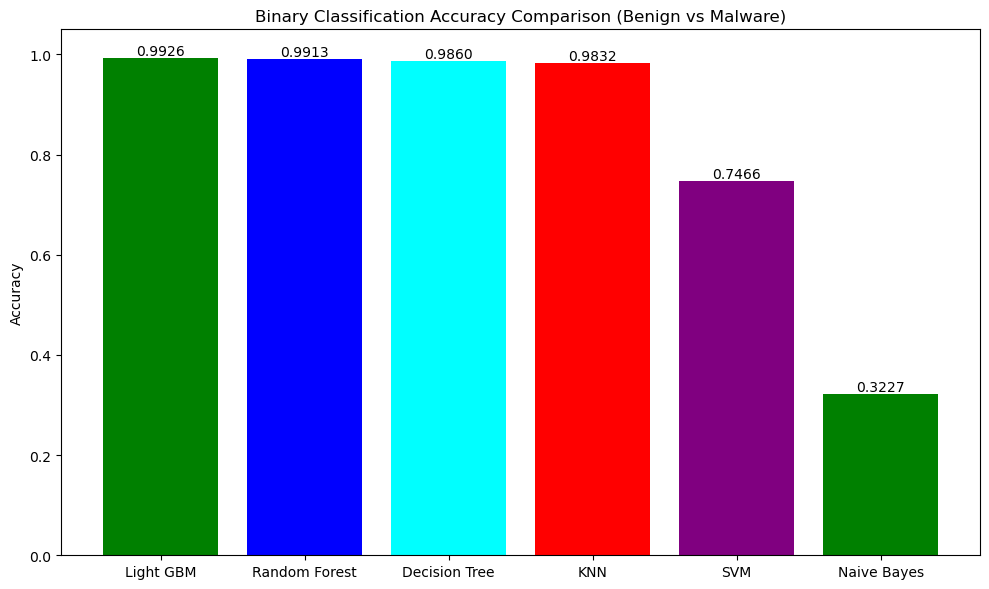


Accuracy Comparison Chart 'accuracy_comparison.png' generated.


In [129]:
models = ['Decision Tree', 'SVM', 'KNN', 'Random Forest', 'Naive Bayes','Light GBM']
accuracies = [acc_dt, acc_svm, acc_knn, acc_rf, acc_nb, acc_lgb]


sorted_models, sorted_accuracies = zip(*sorted(zip(models, accuracies), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(10, 6)) 
bars = plt.bar(sorted_models, sorted_accuracies, color=['green', 'blue', 'cyan', 'red', 'purple']) 
plt.ylabel('Accuracy') 
plt.title('Binary Classification Accuracy Comparison (Benign vs Malware)') # Title of the plot
plt.ylim(0, 1.05) 


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.4f}', ha='center', va='bottom')

plt.tight_layout() 
plt.savefig('accuracy_comparison.png') 
plt.show() 
plt.close() 

print("\nAccuracy Comparison Chart 'accuracy_comparison.png' generated.")

In [125]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [126]:
def plot_roc_curve(model, model_name, X_test, y_test):
    """
    Fits the model (if not already fitted),
    computes ROC curve and AUC, and plots it.
    """

    # Get prediction scores
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
    else:
        
        y_scores = model.decision_function(X_test)

    
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    
    plt.plot(fpr, tpr, linewidth=2,
             label=f"{model_name} (AUC = {roc_auc:.3f})")

    return roc_auc


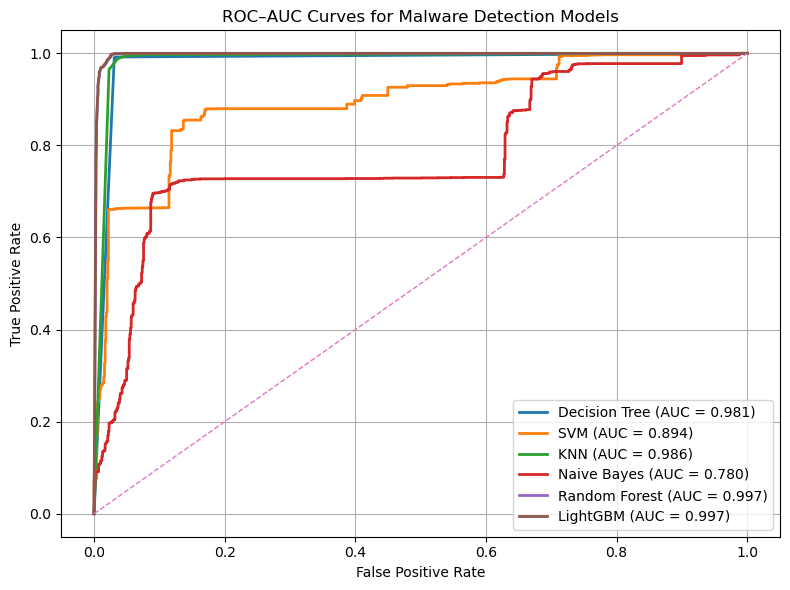

In [132]:
plt.figure(figsize=(8, 6))


#dt.fit(X_train, y_train)
auc_dt = plot_roc_curve(dt, "Decision Tree", X_test, y_test)


#svm_model = SVC(kernel='rbf', probability=True, random_state=42)
#svm_model.fit(X_train, y_train)
auc_svm = plot_roc_curve(svm_model, "SVM", X_test, y_test)

#knn.fit(X_train, y_train)
auc_knn = plot_roc_curve(knn, "KNN", X_test, y_test)

#nb.fit(X_train, y_train)
auc_nb = plot_roc_curve(nb, "Naive Bayes", X_test, y_test)

#rf.fit(X_train, y_train)
auc_rf = plot_roc_curve(rf, "Random Forest", X_test, y_test)

auc_gbm = plot_roc_curve(rf, "LightGBM", X_test, y_test)

plt.plot([0, 1], [0, 1], linestyle='--', linewidth=1)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC–AUC Curves for Malware Detection Models")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [133]:
print("ROC–AUC Scores:")
print(f"Decision Tree   : %.4f" % auc_dt)
print(f"SVM             : %.4f" % auc_svm)
print(f"KNN             : %.4f" % auc_knn)
print(f"Naive Bayes     : %.4f" % auc_nb)
print(f"Random Forest   : %.4f" % auc_rf)
print(f"Light GBM       : %.4f" % auc_gbm)

ROC–AUC Scores:
Decision Tree   : 0.9806
SVM             : 0.8945
KNN             : 0.9862
Naive Bayes     : 0.7804
Random Forest   : 0.9972
Light GBM       : 0.9972


In [25]:
!pip install xgboost

  Using cached xgboost-3.1.2-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.1.2-py3-none-win_amd64.whl (72.0 MB)



--- Training and Evaluating XGBoost ---


D:\Anaconda\Lib\site-packages\xgboost\training.py:199: UserWarning: [00:34:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9916

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1003
           1       0.99      1.00      0.99      2920

    accuracy                           0.99      3923
   macro avg       0.99      0.98      0.99      3923
weighted avg       0.99      0.99      0.99      3923



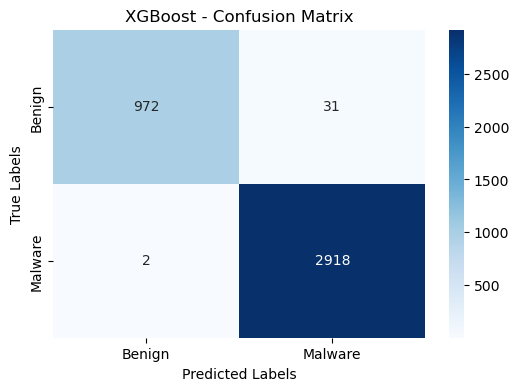

In [134]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42,
    use_label_encoder=False
)
acc_xgb = train_and_evaluate(xgb_model, "XGBoost")

In [48]:
!pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/72.0 MB ? eta -:--:--
   - -------------------------------------- 2.1/72.0 MB 6.8 MB/s eta 0:00:11
   - -------------------------------------- 3.1/72.0 MB 6.3 MB/s eta 0:00:11
   -- ------------------------------------- 4.2/72.0 MB 5.8 MB/s eta 0:00:12
   -- ------------------------------------- 5.2/72.0 MB 5.6 MB/s eta 0:00:12
   --- ------------------------------------ 6.3/72.0 MB 5.4 MB/s eta 0:00:13
   ---- ----------------------------------- 7.3/72.0 MB 5.4 MB/s eta 0:00:12
   ---- ----------------------------------- 8.4/72.0 MB 5.4 MB/s eta 0:00:12
   ----- ---------------------------------- 9.4/72.0 MB 5.3 MB/s eta 0:00:12
   ----- ---------------------------------- 10.5/72.0 MB 5.3 MB/s eta 0:00:12
   ------ --------------------------------- 11.5/72.0 MB 5.3 MB/s eta 0:00:12
   ------- -------------------------------- 12.8/72.0 MB 5.4 MB/s eta 0:00:12
   -------

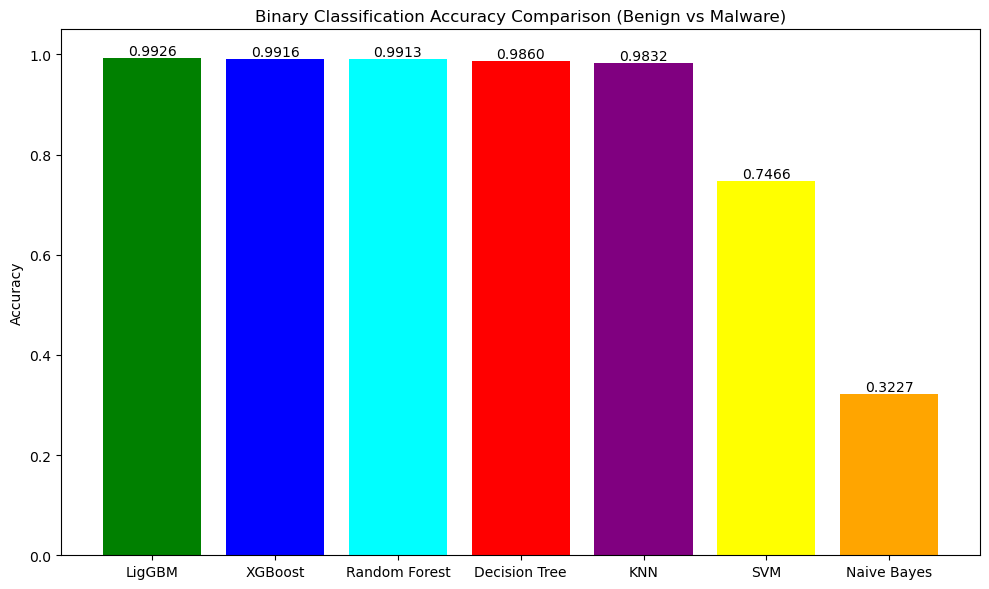


Accuracy Comparison Chart 'accuracy_comparison.png' generated.


In [136]:
models = ['Decision Tree', 'SVM', 'KNN', 'Random Forest', 'Naive Bayes', 'XGBoost',"LigGBM"]
accuracies = [acc_dt, acc_svm, acc_knn, acc_rf, acc_nb, acc_xgb, acc_lgb]


sorted_models, sorted_accuracies = zip(*sorted(zip(models, accuracies), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(10, 6)) 
bars = plt.bar(sorted_models, sorted_accuracies, color=['green', 'blue', 'cyan', 'red', 'purple', 'yellow','orange']) 
plt.ylabel('Accuracy') 
plt.title('Binary Classification Accuracy Comparison (Benign vs Malware)') # Title of the plot
plt.ylim(0, 1.05) 


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.4f}', ha='center', va='bottom')

plt.tight_layout() 
plt.savefig('accuracy_comparison.png') 
plt.show() 
plt.close() 

print("\nAccuracy Comparison Chart 'accuracy_comparison.png' generated.")

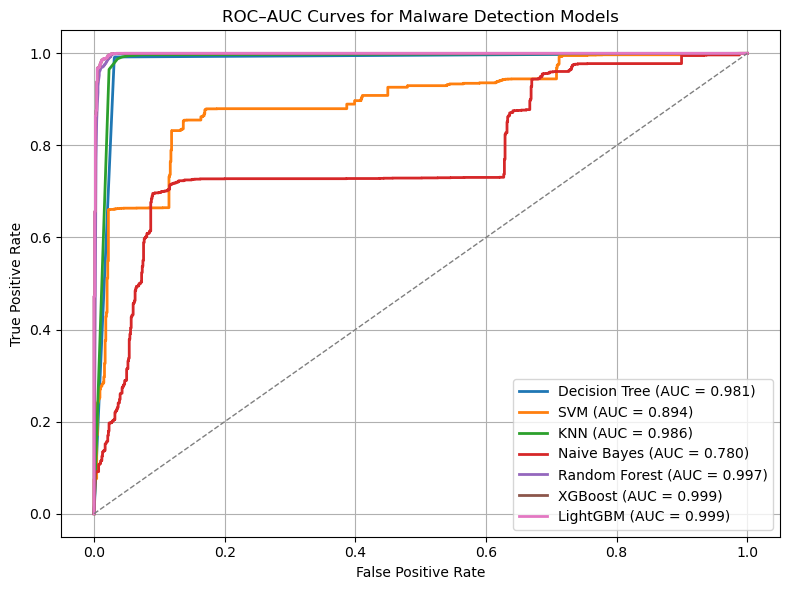

In [138]:
plt.figure(figsize=(8, 6))


#dt.fit(X_train, y_train)
auc_dt = plot_roc_curve(dt, "Decision Tree", X_test, y_test)


#svm_model = SVC(kernel='rbf', probability=True, random_state=42)
#svm_model.fit(X_train, y_train)
auc_svm = plot_roc_curve(svm_model, "SVM", X_test, y_test)

#knn.fit(X_train, y_train)
auc_knn = plot_roc_curve(knn, "KNN", X_test, y_test)

#nb.fit(X_train, y_train)
auc_nb = plot_roc_curve(nb, "Naive Bayes", X_test, y_test)

#rf.fit(X_train, y_train)
auc_rf = plot_roc_curve(rf, "Random Forest", X_test, y_test)

#rf.fit(X_train, y_train)
auc_xgb = plot_roc_curve(xgb_model, "XGBoost", X_test, y_test)

auc_gbm = plot_roc_curve(xgb_model, "LightGBM", X_test, y_test)

plt.plot([0, 1], [0, 1], linestyle='--', linewidth=1)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC–AUC Curves for Malware Detection Models")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [140]:
print("ROC–AUC Scores:")
print(f"Decision Tree   : %.4f" % auc_dt)
print(f"SVM             : %.4f" % auc_svm)
print(f"KNN             : %.4f" % auc_knn)
print(f"Naive Bayes     : %.4f" % auc_nb)
print(f"Random Forest   : %.4f" % auc_rf)
print(f"XGBoost Forest   : %.4f" % auc_xgb)
print(f"Light GBM Forest   : %.4f" % auc_gbm)

ROC–AUC Scores:
Decision Tree   : 0.9806
SVM             : 0.8945
KNN             : 0.9862
Naive Bayes     : 0.7804
Random Forest   : 0.9972
XGBoost Forest   : 0.9985
Light GBM Forest   : 0.9985


In [141]:
from sklearn.metrics import precision_score, f1_score, recall_score
#rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
precision_rf = precision_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)

print(f"RF Precision: {precision_rf:.4f}")
print(f"RF Recall   : {recall_rf:.4f}")
print(f"RF F1-score : {f1_rf:.4f}")
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"RF Accuracy: {accuracy_rf:.4f}")

from sklearn.model_selection import StratifiedKFold, cross_val_score
skf = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

precision_scores = cross_val_score(
    estimator=rf,
    X=X_train,
    y=y_train,
    cv=skf,
    scoring="precision"
)

print("RF Cross-Validation Precision Scores:")
print(precision_scores)
rf_precision_mean = precision_scores.mean()
rf_precision_std = precision_scores.std()
print(f"RF Mean Precision : {rf_precision_mean:.4f}")
print(f"RF Std Deviation  : {rf_precision_std:.4f}")


RF Precision: 0.9895
RF Recall   : 0.9990
RF F1-score : 0.9942
RF Accuracy: 0.9913
RF Cross-Validation Precision Scores:
[0.98981756 0.99657534 0.99275671 0.99023355 0.98893617]
RF Mean Precision : 0.9917
RF Std Deviation  : 0.0028


In [142]:

#dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
precision_dt = precision_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)

print(f"DT Precision: {precision_dt:.4f}")
print(f"DT Recall   : {recall_dt:.4f}")
print(f"DT F1-score : {f1_dt:.4f}")
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"DT Accuracy: {accuracy_dt:.4f}")

skf = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

precision_scores = cross_val_score(
    estimator=dt,
    X=X_train,
    y=y_train,
    cv=skf,
    scoring="precision"
)

print("DT Cross-Validation Precision Scores:")
print(precision_scores)
dt_precision_mean = precision_scores.mean()
dt_precision_std = precision_scores.std()
print(f"DT Mean Precision : {dt_precision_mean:.4f}")
print(f"DT Std Deviation  : {dt_precision_std:.4f}")

DT Precision: 0.9891
DT Recall   : 0.9921
DT F1-score : 0.9906
DT Accuracy: 0.9860
DT Cross-Validation Precision Scores:
[0.9897392  0.99481193 0.99485199 0.98932536 0.99012876]
DT Mean Precision : 0.9918
DT Std Deviation  : 0.0025


In [143]:
#svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
precision_svm = precision_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)

print(f"SVM Precision: {precision_svm:.4f}")
print(f"SVM Recall   : {recall_svm:.4f}")
print(f"SVM F1-score : {f1_svm:.4f}")
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_dt:.4f}")

skf = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

precision_scores = cross_val_score(
    estimator=svm_model,
    X=X_train,
    y=y_train,
    cv=skf,
    scoring="precision"
)

print("SVM Cross-Validation Precision Scores:")
print(precision_scores)
svm_precision_mean = precision_scores.mean()
svm_precision_std = precision_scores.std()
print(f"SVM Mean Precision : {svm_precision_mean:.4f}")
print(f"SVM Std Deviation  : {svm_precision_std:.4f}")

SVM Precision: 0.7460
SVM Recall   : 1.0000
SVM F1-score : 0.8546
SVM Accuracy: 0.9860
SVM Cross-Validation Precision Scores:
[0.74680307 0.74743918 0.74879692 0.74839744 0.74775928]
SVM Mean Precision : 0.7478
SVM Std Deviation  : 0.0007


In [144]:
#knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
precision_knn = precision_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)

print(f"KNN Precision: {precision_knn:.4f}")
print(f"KNN Recall   : {recall_knn:.4f}")
print(f"KNN F1-score : {f1_knn:.4f}")
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.4f}")

skf = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

precision_scores = cross_val_score(
    estimator=knn,
    X=X_train,
    y=y_train,
    cv=skf,
    scoring="precision"
)

print("KNN Cross-Validation Precision Scores:")
print(precision_scores)
knn_precision_mean = precision_scores.mean()
knn_precision_std = precision_scores.std()
print(f"KNN Mean Precision : {knn_precision_mean:.4f}")
print(f"KNN Std Deviation  : {knn_precision_std:.4f}")

KNN Precision: 0.9854
KNN Recall   : 0.9921
KNN F1-score : 0.9887
KNN Accuracy: 0.9832
KNN Cross-Validation Precision Scores:
[0.9838504  0.99226804 0.99101412 0.99057816 0.98210481]
KNN Mean Precision : 0.9880
KNN Std Deviation  : 0.0041


In [145]:
#nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
precision_nb = precision_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)

print(f"NB Precision: {precision_nb:.4f}")
print(f"NB Recall   : {recall_nb:.4f}")
print(f"NB F1-score : {f1_nb:.4f}")
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"NB Accuracy: {accuracy_nb:.4f}")

skf = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

precision_scores = cross_val_score(
    estimator=nb,
    X=X_train,
    y=y_train,
    cv=skf,
    scoring="precision"
)

print("NB Cross-Validation Precision Scores:")
print(precision_scores)
nb_precision_mean = precision_scores.mean()
nb_precision_std = precision_scores.std()
print(f"NB Mean Precision : {nb_precision_mean:.4f}")
print(f"NB Std Deviation  : {nb_precision_std:.4f}")

NB Precision: 0.9888
NB Recall   : 0.0911
NB F1-score : 0.1668
NB Accuracy: 0.3227
NB Cross-Validation Precision Scores:
[0.99099099 0.99537037 0.97747748 0.99103139 0.98623853]
NB Mean Precision : 0.9882
NB Std Deviation  : 0.0061


In [146]:
#xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
precision_xgb = precision_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)

print(f"XGB Precision: {precision_xgb:.4f}")
print(f"XGB Recall   : {recall_xgb:.4f}")
print(f"XGB F1-score : {f1_xgb:.4f}")
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGB Accuracy: {accuracy_xgb:.4f}")

skf = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

precision_scores = cross_val_score(
    estimator=xgb_model,
    X=X_train,
    y=y_train,
    cv=skf,
    scoring="precision"
)

print("XGB Cross-Validation Precision Scores:")
print(precision_scores)
xgb_precision_mean = precision_scores.mean()
xgb_precision_std = precision_scores.std()
print(f"XGB Mean Precision : {xgb_precision_mean:.4f}")
print(f"XGB Std Deviation  : {xgb_precision_std:.4f}")

XGB Precision: 0.9895
XGB Recall   : 0.9993
XGB F1-score : 0.9944
XGB Accuracy: 0.9916


D:\Anaconda\Lib\site-packages\xgboost\training.py:199: UserWarning: [00:45:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\Anaconda\Lib\site-packages\xgboost\training.py:199: UserWarning: [00:45:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\Anaconda\Lib\site-packages\xgboost\training.py:199: UserWarning: [00:45:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\Anaconda\Lib\site-packages\xgboost\training.py:199: UserWarning: [00:45:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\Anaconda\Lib\site-pac

XGB Cross-Validation Precision Scores:
[0.98940229 0.99700855 0.99360886 0.99191833 0.98896903]
XGB Mean Precision : 0.9922
XGB Std Deviation  : 0.0029


In [147]:
#xgb_model.fit(X_train, y_train)
y_pred_gbm = lgb.predict(X_test)
precision_gbm = precision_score(y_test, y_pred_gbm)
f1_gbm = f1_score(y_test, y_pred_gbm)
recall_gbm = recall_score(y_test, y_pred_gbm)

print(f"LGBM Precision: {precision_gbm:.4f}")
print(f"LGBM Recall   : {recall_gbm:.4f}")
print(f"LGBM F1-score : {f1_gbm:.4f}")
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
print(f"LGBM Accuracy: {accuracy_gbm:.4f}")

skf = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

precision_scores = cross_val_score(
    estimator=lgb,
    X=X_train,
    y=y_train,
    cv=skf,
    scoring="precision"
)

print("LGBM Cross-Validation Precision Scores:")
print(precision_scores)
gbm_precision_mean = precision_scores.mean()
gbm_precision_std = precision_scores.std()
print(f"LGBM Mean Precision : {gbm_precision_mean:.4f}")
print(f"LGBM Std Deviation  : {gbm_precision_std:.4f}")

LGBM Precision: 0.9905
LGBM Recall   : 0.9997
LGBM F1-score : 0.9951
LGBM Accuracy: 0.9926
[LightGBM] [Info] Number of positive: 9343, number of negative: 3207
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001706 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6256
[LightGBM] [Info] Number of data points in the train set: 12550, number of used features: 67
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.744462 -> initscore=1.069291
[LightGBM] [Info] Start training from score 1.069291
[LightGBM] [Info] Number of positive: 9343, number of negative: 3207
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6256
[LightGBM] [Info] Number o

In [148]:
results_table = pd.DataFrame({
    "Model": ["XGBoost","RForest","DecTree","KNN","SVM","NB","LGBM"],
    "Accuracy": [accuracy_xgb*100,accuracy_rf*100,accuracy_dt*100,accuracy_knn*100,accuracy_svm*100,accuracy_nb*100,accuracy_gbm*100],
    "Precision": [precision_xgb*100,precision_rf*100,precision_dt*100,precision_knn*100,precision_svm*100,precision_nb*100,precision_gbm*100],
    "Recall": [recall_xgb*100,recall_rf*100,recall_dt*100,recall_knn*100,recall_svm*100,recall_nb*100,recall_gbm*100],
    "F1-score": [f1_xgb*100,f1_rf*100,f1_dt*100,f1_knn*100,f1_svm*100,f1_nb*100,f1_gbm*100],
    "CV_Preci_Mean": [xgb_precision_mean*100,rf_precision_mean*100,dt_precision_mean*100,knn_precision_mean*100,svm_precision_mean*100,nb_precision_mean*100,gbm_precision_mean*100],
    "CV_Preci_Std": [xgb_precision_std*100,rf_precision_std*100,dt_precision_std*100,knn_precision_std*100,svm_precision_std*100,nb_precision_std*100,gbm_precision_std*100]
})

results_table = results_table.round(2)

print(results_table)
winner = "XGBoost"
print("WINNER: Using", winner, "for classification, with",len(X.columns), 'features.')

     Model  Accuracy  Precision  Recall  F1-score  CV_Preci_Mean  CV_Preci_Std
0  XGBoost     99.16      98.95   99.93     99.44          99.22          0.29
1  RForest     99.13      98.95   99.90     99.42          99.17          0.28
2  DecTree     98.60      98.91   99.21     99.06          99.18          0.25
3      KNN     98.32      98.54   99.21     98.87          98.80          0.41
4      SVM     74.66      74.60  100.00     85.46          74.78          0.07
5       NB     32.27      98.88    9.11     16.68          98.82          0.61
6     LGBM     99.26      99.05   99.97     99.51          99.26          0.32
WINNER: Using XGBoost for classification, with 77 features.


                        Feature  Importance
25           MajorLinkerVersion    0.083446
36  MinorOperatingSystemVersion    0.080198
39        MajorSubsystemVersion    0.074482
46           SizeOfStackReserve    0.072692
19                TimeDateStamp    0.071122
..                          ...         ...
58            SectionMaxRawsize    0.000000
68              SectionMainChar    0.000000
66        SectionMinPointerData    0.000000
62           SectionMinPhysical    0.000000
64            SectionMinVirtual    0.000000

[77 rows x 2 columns]


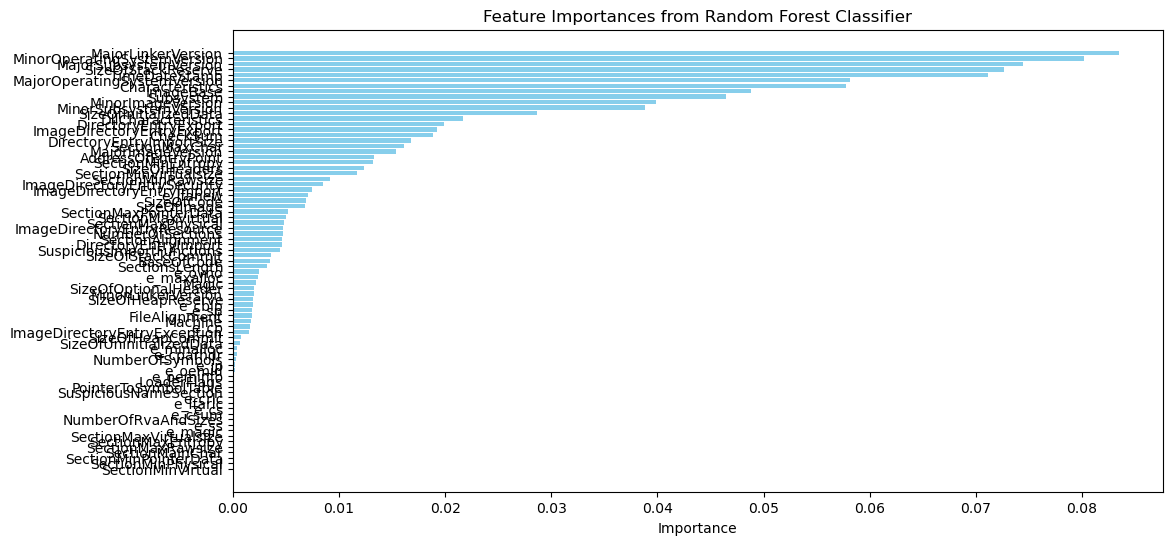

In [149]:
importances = rf.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(importance_df)

# Visualize Feature Importances
plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances from Random Forest Classifier')
plt.gca().invert_yaxis()  # Invert y axis to show the most important features at the top
plt.show()

Features selected (importance > 0.01):
['MajorLinkerVersion' 'MinorOperatingSystemVersion'
 'MajorSubsystemVersion' 'SizeOfStackReserve' 'TimeDateStamp'
 'MajorOperatingSystemVersion' 'Characteristics' 'ImageBase' 'Subsystem'
 'MinorImageVersion' 'MinorSubsystemVersion' 'SizeOfInitializedData'
 'DllCharacteristics' 'DirectoryEntryExport' 'ImageDirectoryEntryExport'
 'CheckSum' 'DirectoryEntryImportSize' 'SectionMaxChar'
 'MajorImageVersion' 'AddressOfEntryPoint' 'SectionMinEntropy'
 'SizeOfHeaders' 'SectionMinVirtualsize']


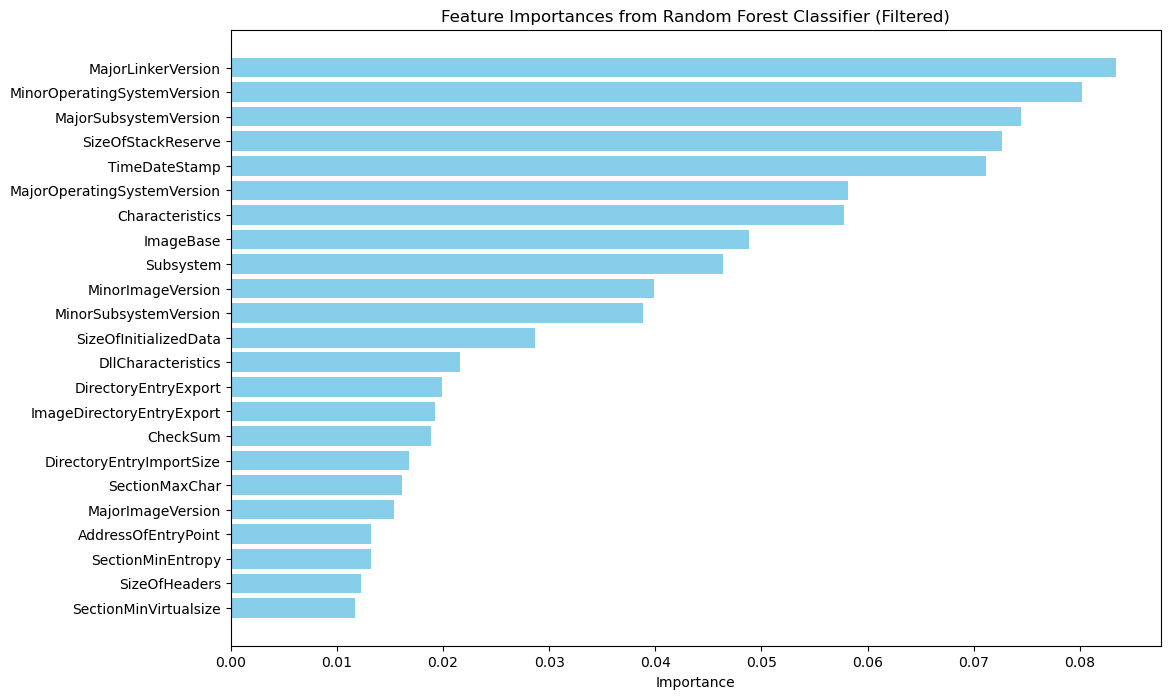

In [150]:
# Set the importance threshold
importance_threshold = 0.01

# Filter features based on the importance threshold
important_features = importance_df[importance_df['Importance'] > importance_threshold]['Feature']
print(f"Features selected (importance > {importance_threshold}):\n{important_features.values}")

# Visualize Feature Importances of Important Features
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'][importance_df['Importance'] > importance_threshold],
         importance_df['Importance'][importance_df['Importance'] > importance_threshold],
         color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances from Random Forest Classifier (Filtered)')
plt.gca().invert_yaxis()  # Invert y axis to show the most important features at the top
plt.show()

In [151]:
# To see the dataset with only the important features
# Create a new dataset with only the important features
important_features_list = important_features.tolist()  # Convert to list
important_features_dataset = dataset[important_features_list]  # Filter the dataset

# save this filtered dataset to a CSV file
important_features_dataset.to_csv('DS_Filtered_Features.csv', index=False)

In [152]:
print("Selected Important Features (importance > 0.01):")
for feature in important_features:
    print(feature) 
print(len(important_features))

Selected Important Features (importance > 0.01):
MajorLinkerVersion
MinorOperatingSystemVersion
MajorSubsystemVersion
SizeOfStackReserve
TimeDateStamp
MajorOperatingSystemVersion
Characteristics
ImageBase
Subsystem
MinorImageVersion
MinorSubsystemVersion
SizeOfInitializedData
DllCharacteristics
DirectoryEntryExport
ImageDirectoryEntryExport
CheckSum
DirectoryEntryImportSize
SectionMaxChar
MajorImageVersion
AddressOfEntryPoint
SectionMinEntropy
SizeOfHeaders
SectionMinVirtualsize
23


In [153]:
X_train_important = X_train[important_features]
X_test_important = X_test[important_features]
#X_train_important = X_train[X_test_important.columns]

In [161]:
from xgboost import XGBClassifier
model = { "DecTree": DecisionTreeClassifier(max_depth=10),
         "RandForest":ek.RandomForestClassifier(n_estimators=50),
          "XGBoost":XGBClassifier(
            n_estimators=200,
            max_depth=6,
            learning_rate=0.1,
            subsample=0.8,
            colsample_bytree=0.8,
            objective="binary:logistic",
            eval_metric="logloss",
            random_state=42,
            use_label_encoder=False),
           "SVM":SVC(random_state=42),
           "KNN":KNeighborsClassifier(n_neighbors=5),
            "NB":GaussianNB(),
            "LGBM":LGBMClassifier(
                n_estimators=200,
                learning_rate=0.05,
                max_depth=-1,
                num_leaves=31,
                subsample=0.8,
                colsample_bytree=0.8,
                random_state=42)}

DecTree : 0.9887840938057609 
RandForest : 0.9918429773132806 


D:\Anaconda\Lib\site-packages\xgboost\training.py:199: UserWarning: [00:55:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost : 0.9926076981901606 
SVM : 0.7466224827937803 
KNN : 0.9829212337496813 
NB : 0.32781034922253377 
[LightGBM] [Info] Number of positive: 11679, number of negative: 4009
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000563 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2913
[LightGBM] [Info] Number of data points in the train set: 15688, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.744454 -> initscore=1.069251
[LightGBM] [Info] Start training from score 1.069251
LGBM : 0.9923527912312006 
['DecTree', 'RandForest', 'XGBoost', 'SVM', 'KNN', 'NB', 'LGBM']
[0.9887840938057609, 0.9918429773132806, 0.9926076981901606, 0.7466224827937803, 0.9829212337496813, 0.32781034922253377, 0.9923527912312006]


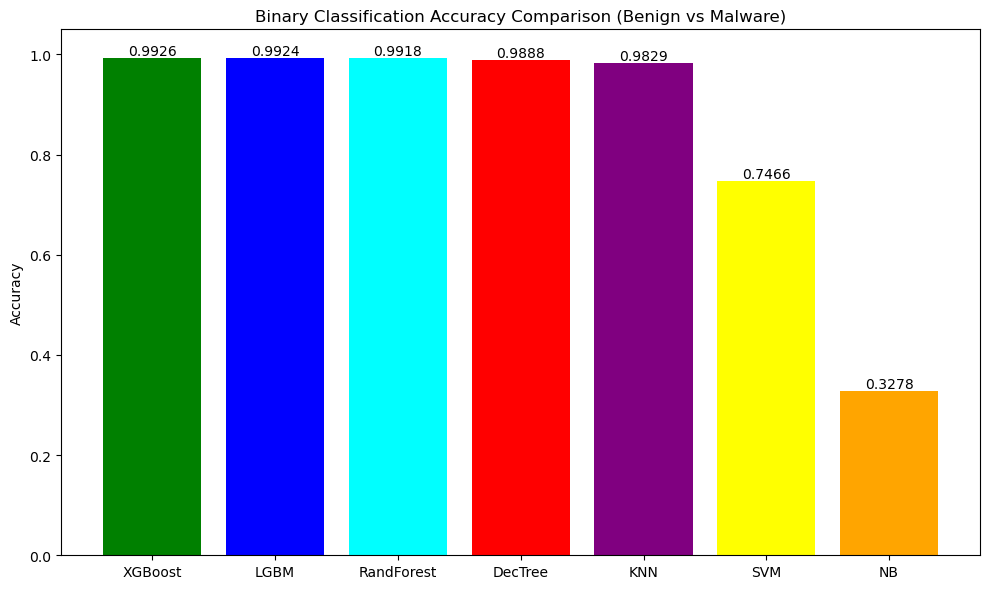


Accuracy Comparison Chart 'accuracy_comparison.png' generated.


In [155]:
results = {}

for algo in model:
    clf = model[algo]
    clf.fit(X_train_important,y_train)
    score = clf.score(X_test_important,y_test)
    print ("%s : %s " %(algo, score))
    results[algo] = float(score)

model1 = {}
results1 = {}
model1  = [s.split(":")[0] for s in model]
print(model1)

#print(results)
results1 = [float(v) for v in results.values() if v is not None]

print(results1)

sorted_models, sorted_accuracies = zip(*sorted(zip(model1, results1), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(10, 6)) 
bars = plt.bar(sorted_models, sorted_accuracies, color=['green', 'blue', 'cyan', 'red', 'purple', 'yellow','orange']) 
plt.ylabel('Accuracy') 
plt.title('Binary Classification Accuracy Comparison (Benign vs Malware)') # Title of the plot
plt.ylim(0, 1.05) 


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.4f}', ha='center', va='bottom')

plt.tight_layout() 
plt.savefig('accuracy_comparison.png') 
plt.show() 
plt.close() 

print("\nAccuracy Comparison Chart 'accuracy_comparison.png' generated.")


In [52]:
!pip install pyfiglet

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ----------------- ---------------------- 0.8/1.8 MB 5.5 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 5.9 MB/s eta 0:00:00


In [156]:
winner = max(results, key=results.get)# Selecting the classifier with good result
print('\033[4m' + '\033[1m' + "ACCURACY"+ '\033[0m' + '\033[0m')
print('\033[1m' + "WINNER: Using", winner, "for classification, with",len(important_features), 'features.' + '\033[0m')


ACCURACY
WINNER: Using XGBoost for classification, with 23 features.


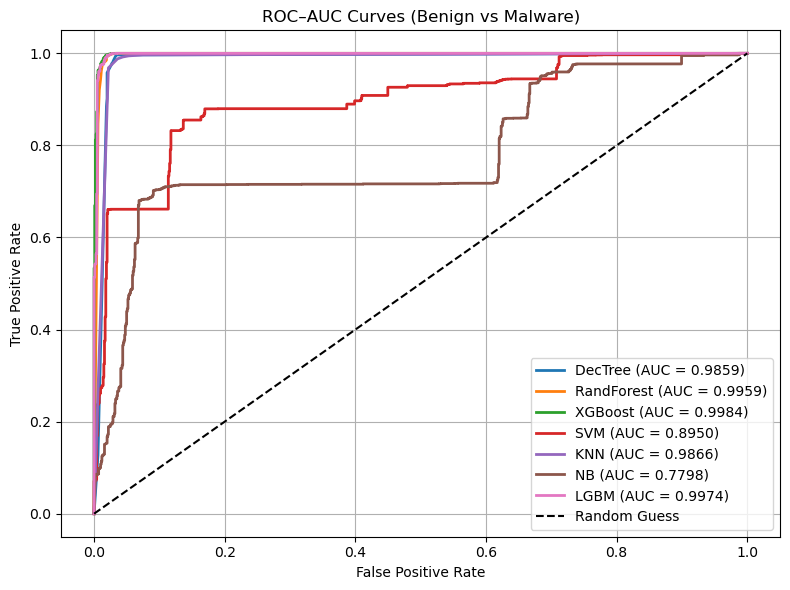


ROC–AUC curve saved as 'roc_auc_curves.png'


In [157]:
plt.figure(figsize=(8, 6))

auc_array = {}

for algo in model:
    clf = model[algo]

    # Get probability scores or decision scores
    if hasattr(clf, "predict_proba"):
        y_scores = clf.predict_proba(X_test_important)[:, 1]
    elif hasattr(clf, "decision_function"):
        y_scores = clf.decision_function(X_test_important)
    else:
        continue

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    auc_array[algo] = roc_auc

    # Plot ROC curve
    plt.plot(fpr, tpr, linewidth=2,
             label=f"{algo} (AUC = {roc_auc:.4f})")

# Random classifier line
plt.plot([0, 1], [0, 1], linestyle="--", color="black", label="Random Guess")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC–AUC Curves (Benign vs Malware)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()

# Save & show
plt.savefig("roc_auc_curves.png", dpi=300)
plt.show()
plt.close()

print("\nROC–AUC curve saved as 'roc_auc_curves.png'")

In [158]:
print("ROC–AUC Scores:")
for algo in model:
    clf = model[algo]
    label=f"{algo} (AUC = {auc_array[algo]:.4f})"
   
    print(label)


ROC–AUC Scores:
DecTree (AUC = 0.9859)
RandForest (AUC = 0.9959)
XGBoost (AUC = 0.9984)
SVM (AUC = 0.8950)
KNN (AUC = 0.9866)
NB (AUC = 0.7798)
LGBM (AUC = 0.9974)


In [159]:
winner = max(auc_array, key=auc_array.get)# Selecting the classifier with good result
print('\033[4m' + '\033[1m' + "ROC-AUC"+ '\033[0m' + '\033[0m')
print('\033[1m' + "WINNER: Using", winner, "for classification, with",len(important_features), 'features' + '\033[0m')


ROC-AUC
WINNER: Using XGBoost for classification, with 23 features


In [160]:
metrics = {}

for algo in model:
    clf = model[algo]

    # Predict class labels
    y_pred = clf.predict(X_test_important)

    # Compute metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # 5-fold Cross Validation Precision
    scores = cross_val_score(
        clf,
        X_train_important,
        y_train,
        cv=5,
        scoring="precision"
    )

    metrics[algo] = {
        "Accuracy": acc*100,
        "Precision": prec*100,
        "Recall": rec*100,
        "F1-Score": f1*100,
        "CV_Preci": scores.mean()*100,
        "CV_Std_Dev": scores.std()
    }


D:\Anaconda\Lib\site-packages\xgboost\training.py:199: UserWarning: [00:58:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\Anaconda\Lib\site-packages\xgboost\training.py:199: UserWarning: [00:58:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\Anaconda\Lib\site-packages\xgboost\training.py:199: UserWarning: [00:58:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\Anaconda\Lib\site-packages\xgboost\training.py:199: UserWarning: [00:58:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\Anaconda\Lib\site-pac

[LightGBM] [Info] Number of positive: 9343, number of negative: 3207
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000492 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2887
[LightGBM] [Info] Number of data points in the train set: 12550, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.744462 -> initscore=1.069291
[LightGBM] [Info] Start training from score 1.069291
[LightGBM] [Info] Number of positive: 9343, number of negative: 3207
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000573 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2878
[LightGBM] [Info] Number of data points in the train set: 12550, number of used features: 23
[LightGBM] [Info] [binar

In [162]:
metrics_df = pd.DataFrame(metrics).T
print("\nPerformance Metrics Summary:")
print(metrics_df)


Performance Metrics Summary:
             Accuracy  Precision      Recall   F1-Score   CV_Preci  CV_Std_Dev
DecTree     98.878409  98.845109   99.657534  99.249659  98.768375    0.001502
RandForest  99.184298  99.015614   99.897260  99.454483  99.166415    0.001594
XGBoost     99.260770  99.049881   99.965753  99.505710  99.141521    0.001754
SVM         74.662248  74.603986  100.000000  85.455078  74.779149    0.000916
KNN         98.292123  98.503910   99.212329  98.856850  98.812587    0.002017
NB          32.781035  97.009967   10.000000  18.131015  96.171287    0.019446
LGBM        99.235279  99.016282   99.965753  99.488753  99.208998    0.001270


In [164]:
cv_precision_df = pd.DataFrame({
    algo: {
        "CV_Preci": scores.mean()*100,
        "CV_Std_Dev": scores.std()
    }
    for algo, scores in cv_precision.items()
}).T

print("\nCross-Validation Precision Summary:")
print(cv_precision_df)


Cross-Validation Precision Summary:
             CV_Preci  CV_Std_Dev
DecTree     98.784957    0.000831
RandForest  99.174693    0.001376
XGBoost     99.141521    0.001754
SVM         74.779149    0.000916
KNN         98.812587    0.002017
NB          96.171287    0.019446


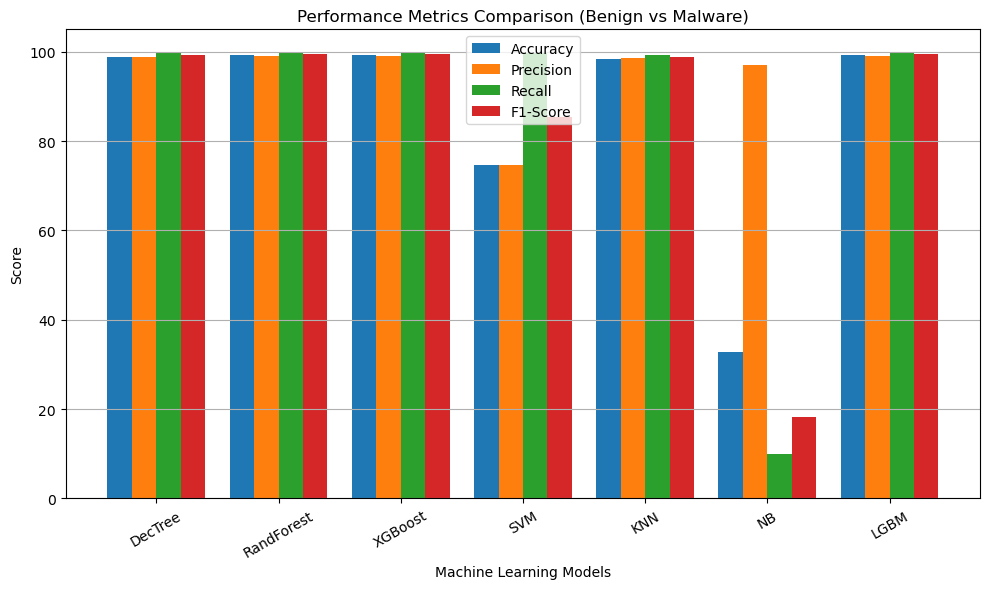

Saved: performance_metrics_bar_chart.png


In [167]:
algorithms = list(metrics.keys())

accuracy = [metrics[a]["Accuracy"] for a in algorithms]
precision = [metrics[a]["Precision"] for a in algorithms]
recall = [metrics[a]["Recall"] for a in algorithms]
f1_score = [metrics[a]["F1-Score"] for a in algorithms]

x = np.arange(len(algorithms))
width = 0.2

plt.figure(figsize=(10, 6))

plt.bar(x - 1.5*width, accuracy, width, label="Accuracy")
plt.bar(x - 0.5*width, precision, width, label="Precision")
plt.bar(x + 0.5*width, recall, width, label="Recall")
plt.bar(x + 1.5*width, f1_score, width, label="F1-Score")

plt.xlabel("Machine Learning Models")
plt.ylabel("Score")
plt.title("Performance Metrics Comparison (Benign vs Malware)")
plt.xticks(x, algorithms, rotation=30)
plt.legend()
plt.grid(axis="y")
plt.tight_layout()

plt.savefig("performance_metrics_bar_chart.png", dpi=300)
plt.show()
plt.close()

print("Saved: performance_metrics_bar_chart.png")

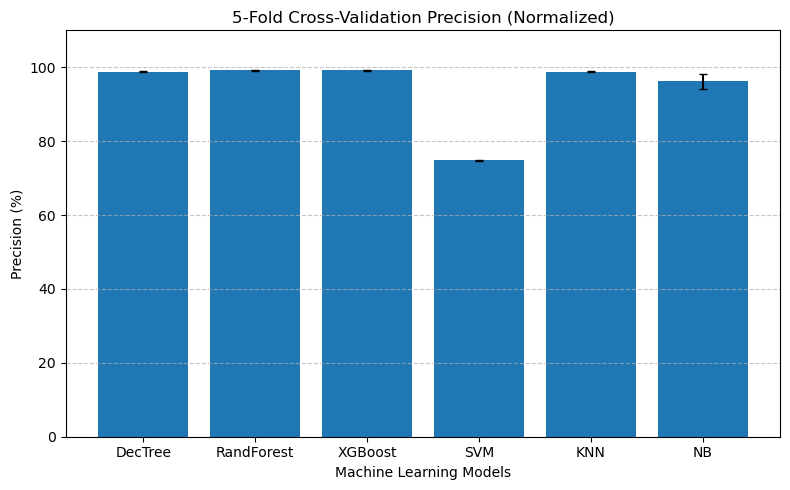

Saved: cv_precision_normalized_percent.png


In [168]:
cv_algorithms = list(cv_precision.keys())
cv_means = [cv_precision[a].mean() * 100 for a in cv_algorithms]
cv_stds = [cv_precision[a].std() * 100 for a in cv_algorithms]

plt.figure(figsize=(8, 5))

plt.bar(
    cv_algorithms,
    cv_means,
    yerr=cv_stds,
    capsize=3
)

plt.ylabel("Precision (%)")
plt.xlabel("Machine Learning Models")
plt.title("5-Fold Cross-Validation Precision (Normalized)")
plt.ylim(0, 110)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

plt.savefig("cv_precision_normalized_percent.png", dpi=300)
plt.show()
plt.close()

print("Saved: cv_precision_normalized_percent.png")